In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

In [2]:
#let's go back one level up directory wise
os.chdir("../")

In [3]:
df = pd.read_csv("artifacts/dataset/raw/Forest_fire.csv")

## Exploratory Data Analysis

In [4]:
df.head()

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,40,45,20,1
1,Bangalore,50,30,10,1
2,Ecuador,10,20,70,0
3,a,60,45,70,1
4,Bangalore,30,48,10,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             29 non-null     object
 1   Oxygen           39 non-null     int64 
 2   Temperature      39 non-null     int64 
 3   Humidity         39 non-null     int64 
 4   Fire Occurrence  39 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [6]:
df.describe()

,Oxygen,Temperature,Humidity,Fire Occurrence
count,39.000000,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051,0.512821
std,23.734872,16.225677,28.046905,0.506370
min,0.000000,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000,0.000000
50%,30.000000,35.000000,30.000000,1.000000
75%,50.000000,45.000000,62.500000,1.000000
max,89.000000,60.000000,100.000000,1.000000


In [7]:
df.isnull().sum()

Area               10
Oxygen              0
Temperature         0
Humidity            0
Fire Occurrence     0
dtype: int64

In [8]:
df = df.drop('Area', axis=1).reset_index(drop=True)

In [9]:
df.head(2)

,Oxygen,Temperature,Humidity,Fire Occurrence
0,40,45,20,1
1,50,30,10,1


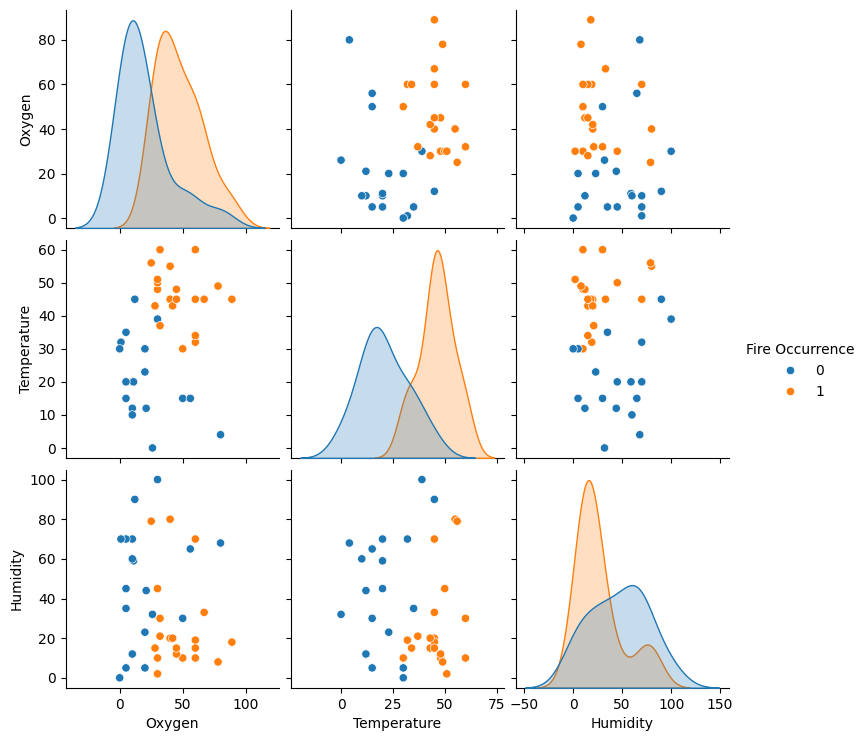

In [20]:
sns.pairplot(data=df, hue= "Fire Occurrence")

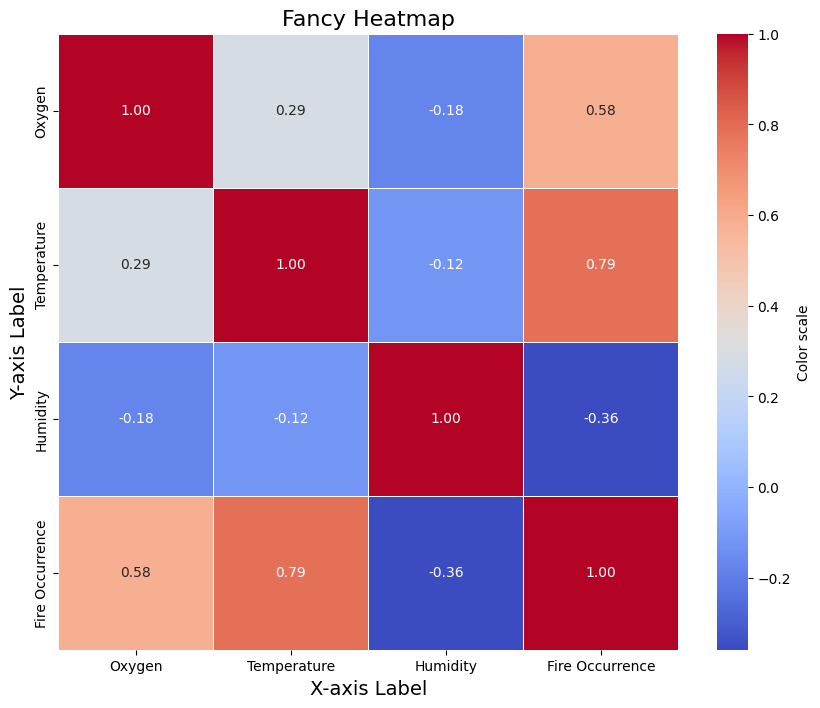

In [13]:
cmap = "coolwarm"
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Color scale'})

# Customize labels and title
plt.title("Fancy Heatmap", fontsize=16)
plt.xlabel("X-axis Label", fontsize=14)
plt.ylabel("Y-axis Label", fontsize=14)

# Display the plot
plt.show()

## Machine Learning

In [21]:
df.columns

Index(['Oxygen', 'Temperature', 'Humidity', 'Fire Occurrence'], dtype='object')

In [23]:
features = ['Oxygen', 'Temperature', 'Humidity']
target = ['Fire Occurrence']

In [35]:
# Separate features (X) and target variable (y)
X = df.drop(target, axis=1)  # Adjust 'target_column' to your actual target column
y = df[target]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict the target variable on the validation set
y_val_pred = logreg_model.predict(X_val)

# Get predicted probabilities
y_val_proba = logreg_model.predict_proba(X_val)[:, 1] # to extract the predicted probabilities of the positive class for each sample.

/root/.local/share/virtualenvs/mlops-forest-fire-prediction-DyGv3a-t/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Evaluation

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
classification_report_str = classification_report(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## Save Model

In [40]:
import pickle

# Save the model to a file using pickle
with open('artifacts/model/logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)


## Scoring

In [42]:
# Load the model from the file using pickle
with open('artifacts/model/logreg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [56]:
# Example list of feature values
new_data_point = [40, 45, 20]

# Convert the list to a NumPy array and reshape it to match the expected input format
new_data_point_array = np.array(new_data_point).reshape(1, -1)
# Make predictions
predicted_label = loaded_model.predict(new_data_point_array)
predicted_proba = loaded_model.predict_proba(new_data_point_array)[:, 1]

/root/.local/share/virtualenvs/mlops-forest-fire-prediction-DyGv3a-t/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/root/.local/share/virtualenvs/mlops-forest-fire-prediction-DyGv3a-t/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
print("-------------" * 5)
print(f"Predicted Label: {predicted_label[0]}")
print("-------------" * 5)
print(f"Predicted Probability of Positive Class: {predicted_proba[0]:.4f}")
print("-------------" * 5)


-----------------------------------------------------------------
Predicted Label: 1
-----------------------------------------------------------------
Predicted Probability of Positive Class: 1.0000
-----------------------------------------------------------------
